In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from itertools import combinations
from collections import Counter

In [2]:
# Reading the CSV file
df = pd.read_csv('../data/complete_movie_dataset.csv')

In [3]:
# Displaying top 5 rows
df.head()

,title,movie_ID,overview,original_language,release_date,popularity,vote_count,vote_average,budget,genres,homepage,production_companies,production_countries,revenue,runtime,director,top_actors
0,Venom: The Last Dance,912649,Eddie and Venom are on the run. Hunted by both...,en,2024-10-22,3047.508,789,6.489,120000000,"['Science Fiction', 'Action', 'Adventure']",https://venom.movie,"['Columbia Pictures', 'Pascal Pictures', 'Matt...",['United States of America'],394000000,109,Kelly Marcel,"Tom Hardy, Chiwetel Ejiofor, Juno Temple"
1,Terrifier 3,1034541,Five years after surviving Art the Clown's Hal...,en,2024-10-09,1929.351,1031,6.909,2000000,"['Horror', 'Thriller', 'Mystery']",https://terrifier3.com/,"['Cineverse', 'Bloody Disgusting', 'Dark Age C...",['United States of America'],78573405,125,Damien Leone,"Lauren LaVera, David Howard Thornton, Samantha..."
2,The Wild Robot,1184918,"After a shipwreck, an intelligent robot called...",en,2024-09-12,1808.363,2938,8.471,78000000,"['Animation', 'Science Fiction', 'Family']",https://www.thewildrobotmovie.com,['DreamWorks Animation'],['United States of America'],308583746,102,Chris Sanders,"Lupita Nyong'o, Pedro Pascal, Kit Connor"
3,Apocalypse Z: The Beginning of the End,1118031,When a kind of rabies that transforms people i...,es,2024-10-04,1638.618,498,6.784,0,"['Drama', 'Action', 'Horror']",https://nostromopictures.com/en/movies/coming-...,['Nostromo Pictures'],['Spain'],0,119,Carles Torrens,"Francisco Ortiz, José María Yázpik, Berta Vázquez"
4,Gladiator II,558449,Years after witnessing the death of the revere...,en,2024-11-13,1742.500,450,6.791,310000000,"['Action', 'Adventure', 'Drama']",https://www.gladiator.movie,"['Paramount Pictures', 'Red Wagon Entertainmen...",['United States of America'],87000000,148,Ridley Scott,"Paul Mescal, Denzel Washington, Pedro Pascal"


In [4]:
# Displaying the number of rows and columns
df.shape

(9130, 17)

In [5]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9130 non-null   object 
 1   movie_ID              9130 non-null   int64  
 2   overview              9052 non-null   object 
 3   original_language     9130 non-null   object 
 4   release_date          9100 non-null   object 
 5   popularity            9130 non-null   float64
 6   vote_count            9130 non-null   int64  
 7   vote_average          9130 non-null   float64
 8   budget                9130 non-null   int64  
 9   genres                9130 non-null   object 
 10  homepage              3730 non-null   object 
 11  production_companies  9130 non-null   object 
 12  production_countries  9130 non-null   object 
 13  revenue               9130 non-null   int64  
 14  runtime               9130 non-null   int64  
 15  director             

In [6]:
# A summary of numerical columns
df.describe()

,movie_ID,popularity,vote_count,vote_average,budget,revenue,runtime
count,9.130000e+03,9130.000000,9130.000000,9130.000000,9.130000e+03,9.130000e+03,9130.000000
mean,3.568933e+05,39.765204,1739.347536,6.296596,2.059244e+07,6.397395e+07,101.794633
std,4.145646e+05,74.633426,3277.281266,1.522409,4.089947e+07,1.631903e+08,29.866061
min,1.100000e+01,8.924000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.346425e+04,18.834250,107.250000,5.900000,0.000000e+00,0.000000e+00,90.000000
50%,1.590065e+05,25.480000,489.000000,6.558000,1.400005e+06,2.100000e+06,101.000000
75%,6.157520e+05,39.598250,1818.000000,7.150750,2.300000e+07,5.107378e+07,116.000000
max,1.386251e+06,3047.508000,36544.000000,10.000000,4.600000e+08,2.923706e+09,650.000000


In [7]:
df.isnull().sum()

title                      0
movie_ID                   0
overview                  78
original_language          0
release_date              30
popularity                 0
vote_count                 0
vote_average               0
budget                     0
genres                     0
homepage                5400
production_companies       0
production_countries       0
revenue                    0
runtime                    0
director                  64
top_actors                75
dtype: int64

Dropping the 'homepage' column as it contains 5,400 missing values (out of 9,130 rows), which made it largely irrelevant for analysis.

### Drop the homepage column

In [8]:
print(df['homepage'].notna().sum())

df = df.drop(columns=['homepage'])

print(df.shape)

3730
(9130, 16)


## Top 10 Most Popular Genres

In this analysis, we explore the most popular genres based on the frequency of their occurrence across all movies in the dataset. The following bar chart shows the top 10 genres.

In [9]:
print(df['genres'].head(10))

0           ['Science Fiction', 'Action', 'Adventure']
1                    ['Horror', 'Thriller', 'Mystery']
2           ['Animation', 'Science Fiction', 'Family']
3                        ['Drama', 'Action', 'Horror']
4                     ['Action', 'Adventure', 'Drama']
5              ['Action', 'Comedy', 'Science Fiction']
6               ['Drama', 'Horror', 'Science Fiction']
7                               ['Action', 'Thriller']
8    ['Animation', 'Science Fiction', 'Adventure', ...
9                      ['Action', 'Comedy', 'Fantasy']
Name: genres, dtype: object


In [10]:
# Convert the string representation of lists into actual lists
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

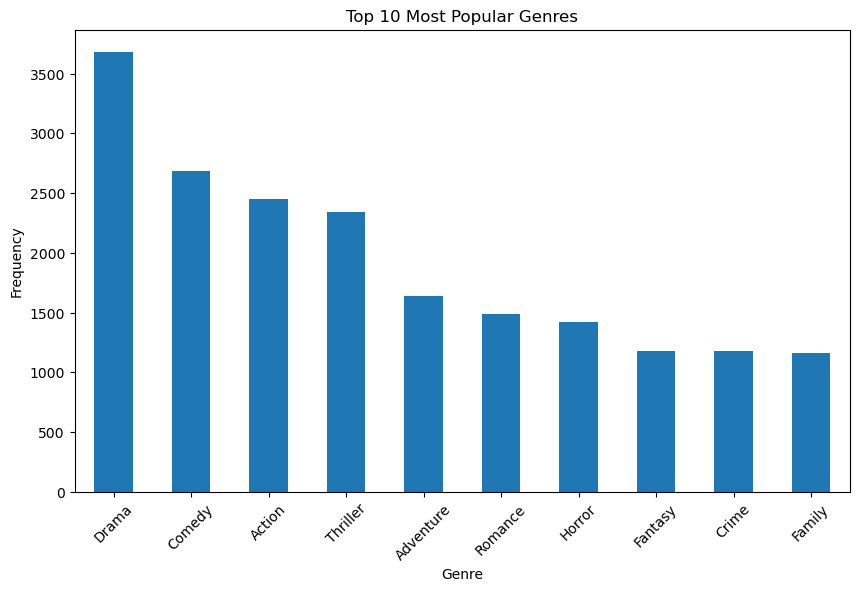

In [11]:
# Exploding the 'genres' column to get individual rows for each genre
genres_df = df.explode('genres')

# Counting the most popular individual genres by their frequency
top_genres = genres_df['genres'].value_counts().head(10)

# Plotting the top 10 most popular genres
top_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Top 10 Most Popular Actors

In this analysis, we determine the top 10 most popular actors based on the number of movies they have been involved in. We first clean and prepare the data, then extract the actor information from the 'top_actors' column. Afterward, we calculate the number of occurrences for each actor and sort them by popularity.

In [12]:
print(df['top_actors'].head(10))

0             Tom Hardy, Chiwetel Ejiofor, Juno Temple
1    Lauren LaVera, David Howard Thornton, Samantha...
2             Lupita Nyong'o, Pedro Pascal, Kit Connor
3    Francisco Ortiz, José María Yázpik, Berta Vázquez
4         Paul Mescal, Denzel Washington, Pedro Pascal
5             Ryan Reynolds, Hugh Jackman, Emma Corrin
6           Demi Moore, Margaret Qualley, Dennis Quaid
7             Aaron Eckhart, Tim Roth, Abigail Breslin
8    Chris Hemsworth, Brian Tyree Henry, Scarlett J...
9                Dwayne Johnson, Chris Evans, Lucy Liu
Name: top_actors, dtype: object


In [13]:
# Split the 'top_actors' column into lists
df['top_actors'] = df['top_actors'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(df['top_actors'])

0              [Tom Hardy, Chiwetel Ejiofor, Juno Temple]
1       [Lauren LaVera, David Howard Thornton, Samanth...
2              [Lupita Nyong'o, Pedro Pascal, Kit Connor]
3       [Francisco Ortiz, José María Yázpik, Berta Váz...
4          [Paul Mescal, Denzel Washington, Pedro Pascal]
                              ...                        
9125        [Charles Bronson, Lee Marvin, Andrew Stevens]
9126                    [Ji Hee, Lee Je-kwan, Im Tae-mok]
9127    [Mel Gibson, Kevin Hernandez, Daniel Giménez C...
9128                  [Big Sean, Pamela Adlon, Lucy Hale]
9129           [Omar Sy, Louane Emera, Franck Gastambide]
Name: top_actors, Length: 9130, dtype: object


<Axes: title={'center': 'Top 10 Most Famous Actors'}, xlabel='top_actors'>

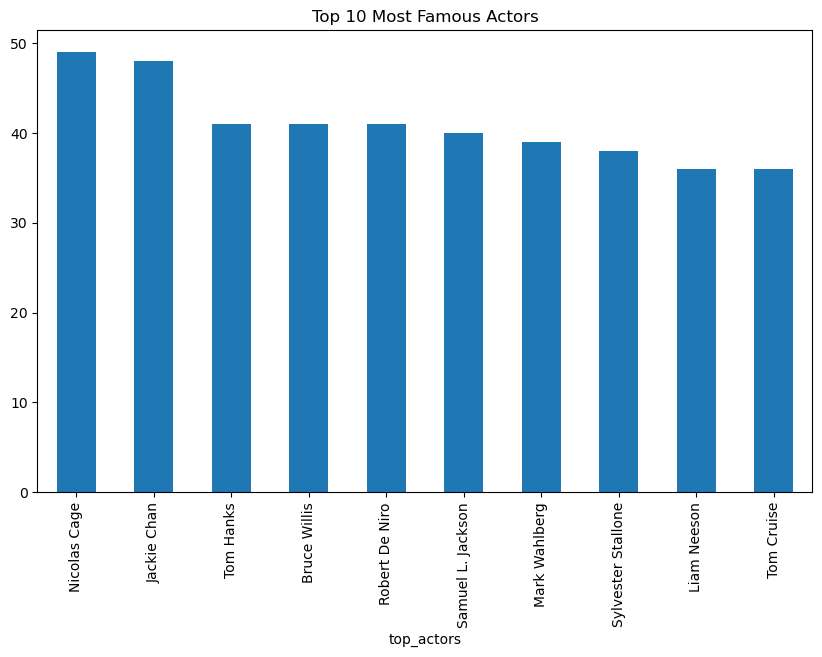

In [14]:
# Exploding the 'top_actors' column to get individual rows for each actor
actors_df = df.explode('top_actors')

# Counting the most frequent actors
top_actors = actors_df['top_actors'].value_counts().head(10)

#Plotting the top 10 most famous actors
top_actors.plot(kind='bar', figsize=(10, 6), title="Top 10 Most Famous Actors", x = 'Actor', y = 'Number of Appearances')

## Top 10 popular directors

In this analysis, we identify the top 10 most popular directors based on the number of movies they have directed. We count the number of movies directed by each individual director and sort them in descending order to display the top 10 directors.

<Axes: title={'center': 'Top 10 Directors by Number of Movies'}, xlabel='director'>

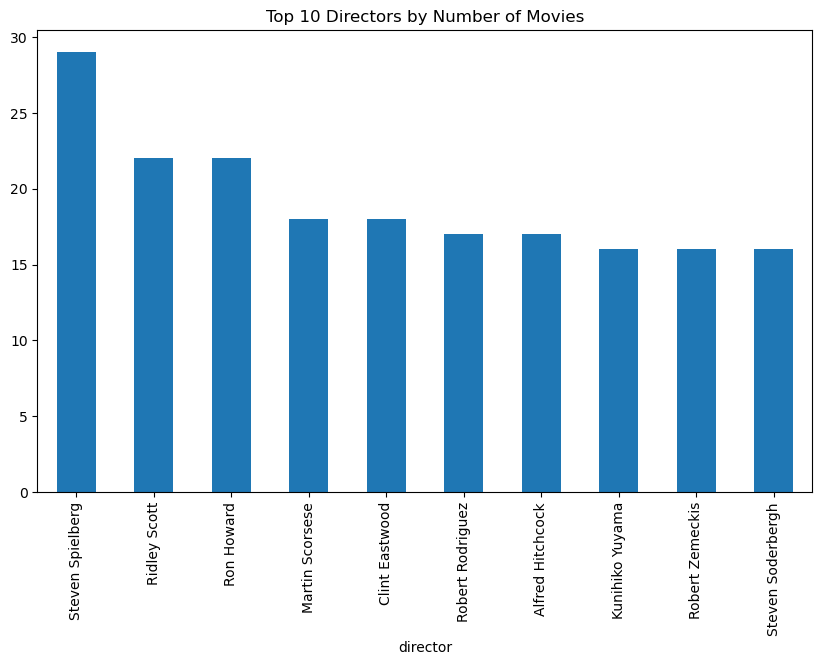

In [15]:
# Count the occurrences of each director
top_directors = df['director'].value_counts().head(10)

top_directors.plot(kind='bar', figsize=(10, 6), title="Top 10 Directors by Number of Movies")

## Top 10 movies by Revenue

In this analysis, we identify the top 10 movies based on their total revenue. The dataset includes revenue data, and we sort the movies by their revenue in descending order to highlight the highest-grossing films.

<Axes: title={'center': 'Top 10 Movies by Revenue'}, xlabel='title'>

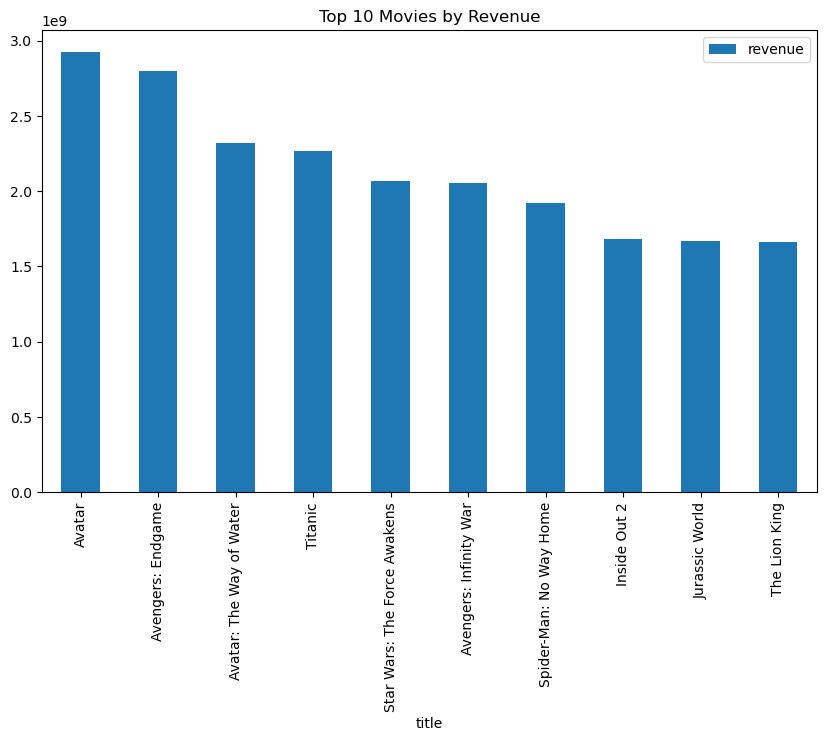

In [16]:
top_revenue_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top_revenue_movies.plot(kind='bar', x='title', y='revenue', figsize=(10, 6), title="Top 10 Movies by Revenue")

## Average Runtime

This analysis computes the average runtime of the movies in the dataset. The calculation is based on the runtime column, which represents the length of each movie in minutes.

- The mean runtime is useful for understanding the typical length of movies in the dataset and can highlight any trends, such as whether shorter or longer movies are more common in certain genres or periods.

***Note***: Movies with a runtime of zero were excluded to ensure the accuracy of this calculation.


<Axes: title={'center': 'Movie Runtime Distribution'}, ylabel='Frequency'>

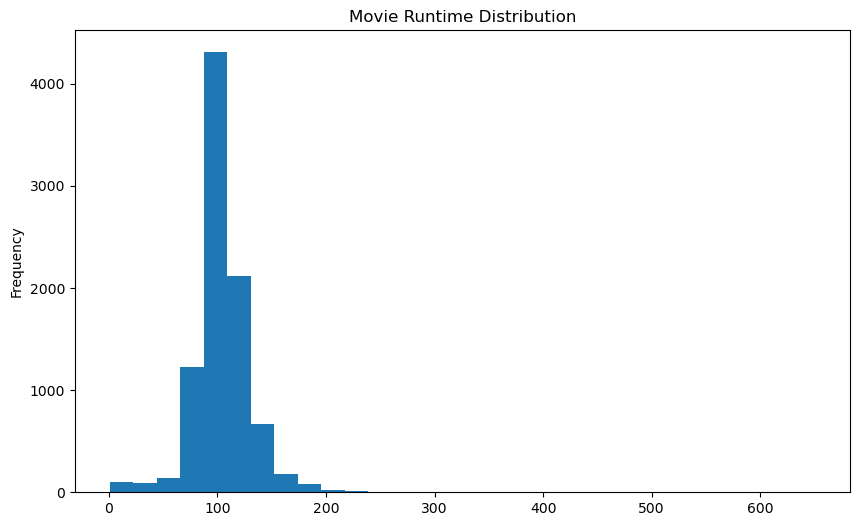

In [17]:
df[df['runtime'] > 0]['runtime'].dropna().plot(kind='hist', bins=30, figsize=(10, 6), title="Movie Runtime Distribution")

## Average Voting

This analysis calculates the average vote score for movies in the dataset based on the vote_average column. It provides insight into how movies are rated by users.

- The average vote is essential to understand the general reception of the movies in the dataset.
- Movies with zero votes or missing values were excluded from this calculation to ensure more accurate results.

<Axes: title={'center': 'Distribution of Movie Ratings'}, ylabel='Frequency'>

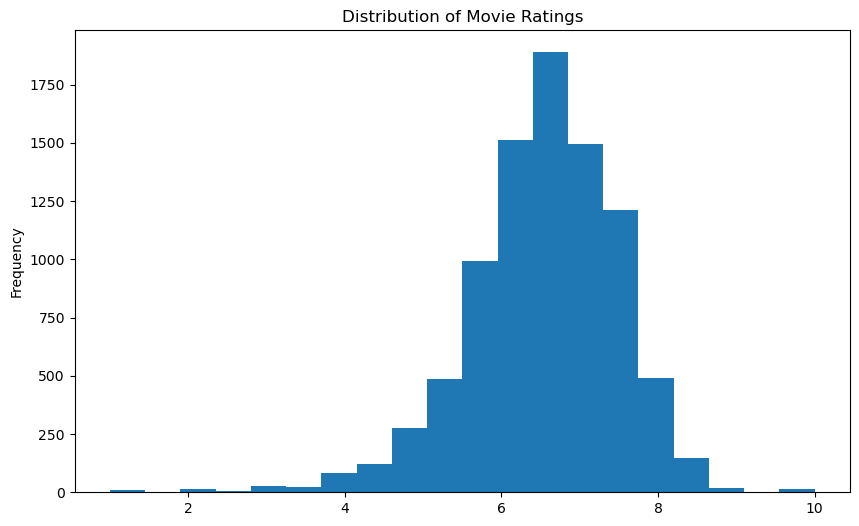

In [18]:
df[df['vote_average'] > 0]['vote_average'].dropna().plot(kind='hist', bins=20, figsize=(10, 6), title="Distribution of Movie Ratings")

## Top Production Companies

This analysis identifies the top production companies by the number of movies in the dataset. It helps us understand which production companies are most active in producing movies.

<Axes: title={'center': 'Top 10 Production Companies'}, xlabel='production_companies'>

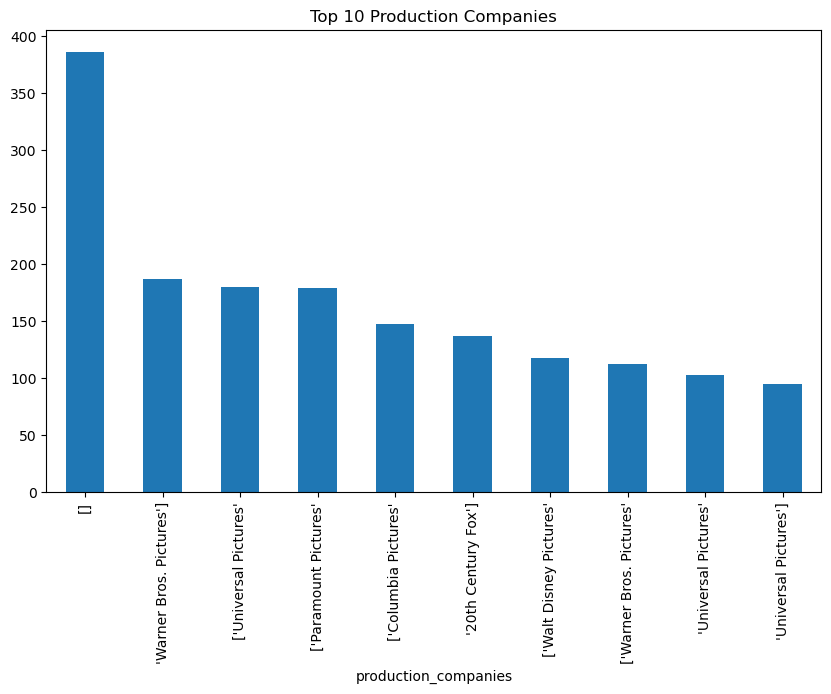

In [19]:
df['production_companies'] = df['production_companies'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
companies_df = df.explode('production_companies')
top_companies = companies_df['production_companies'].value_counts().head(10)
top_companies.plot(kind='bar', figsize=(10, 6), title="Top 10 Production Companies")

## Language Distribution

This analysis examines the distribution of languages used in the movies dataset. It provides insights into the diversity of languages in the dataset and the prevalence of different languages in the movie industry.

<Axes: title={'center': 'Top 10 Movie Languages'}, xlabel='original_language'>

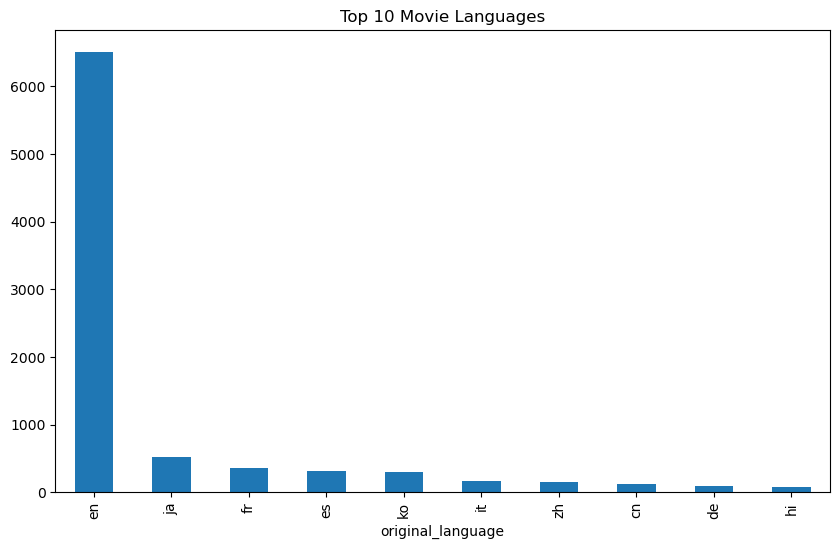

In [20]:
df['original_language'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Movie Languages")

## Release Year Distribution

This analysis visualizes the distribution of movies across different release years in the dataset. It helps to understand the trends over time in the movie industry and identify the periods with the highest movie production.

<Axes: title={'center': 'Movies Released Over Time'}, xlabel='release_year'>

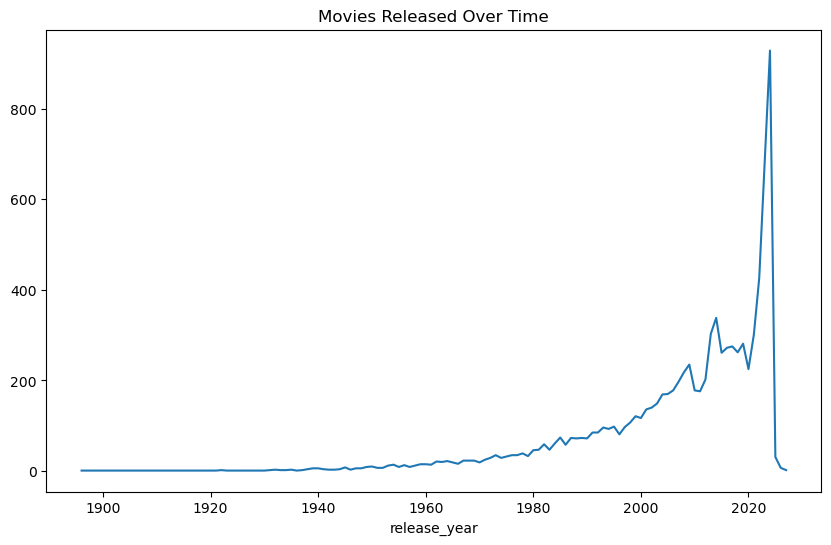

In [21]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6), title="Movies Released Over Time")

## Genre vs Revenue 

In this analysis, we examine the relationship between movie genres and their average revenue. The goal is to identify which genres tend to generate higher revenues on average, which can be valuable for understanding trends in the movie industry.

<Axes: title={'center': 'Top 10 Genres by Average Revenue'}, xlabel='genres'>

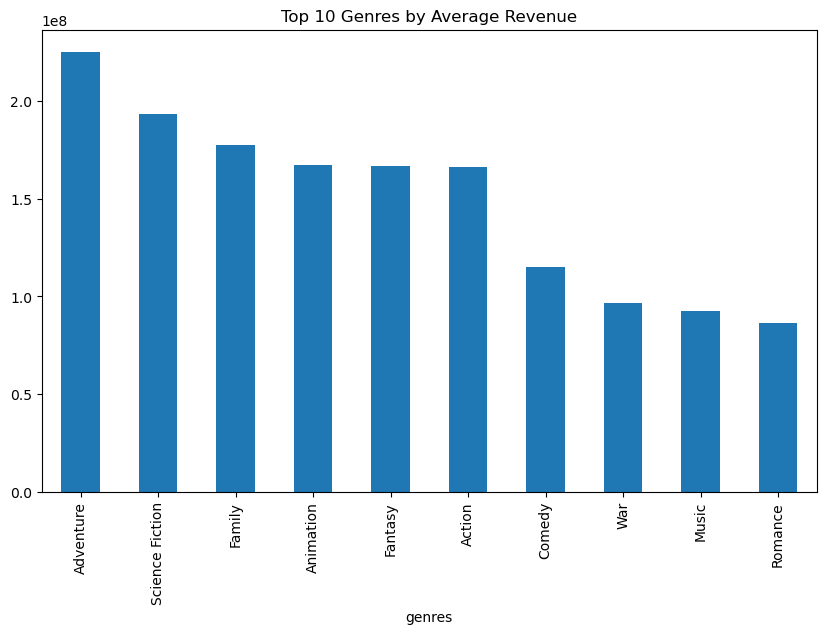

In [22]:
df_filtered = df[df['revenue'] > 0]

genre_revenue = df_filtered.explode('genres').groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
genre_revenue.plot(kind='bar', figsize=(10, 6), title="Top 10 Genres by Average Revenue")

## Voting vs Revenue

In this analysis, we investigate the relationship between a movie's average vote rating and its revenue. By analyzing this relationship, we can determine whether higher-rated movies tend to generate more revenue.

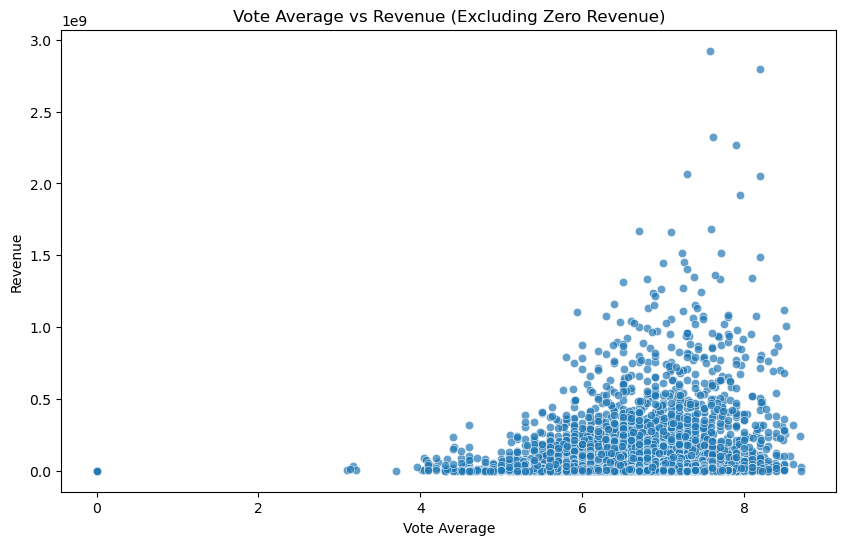

In [23]:
# Exclude rows where revenue is 0
df_filtered = df[df['revenue'] > 0]

# Scatter plot for Vote Average vs Revenue (excluding zero revenue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='revenue', data=df_filtered, alpha=0.7)
plt.title('Vote Average vs Revenue (Excluding Zero Revenue)')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

## Genre Combinations

In this analysis, we explore the combinations of genres present in the dataset. Some movies fall under multiple genres, and we aim to find the most common genre combinations.

- We first split the genres column, which contains a list of genres, into individual genres for each movie.
- We then counted the frequency of these combinations and displayed the top combinations that appear most frequently in the dataset.

This analysis helps us understand the prevalent genre pairings and their distribution in the dataset.

In [24]:
# List to store all genre combinations
all_combinations = []

for genres in df['genres']:
    if isinstance(genres, list) and len(genres) > 1:  # Ensure list has more than 1 genre
        all_combinations.extend(combinations(sorted(genres), 2))

# Count the frequency of each genre combination
combination_counts = Counter(all_combinations)

# Convert to a DataFrame
genre_comb_df = pd.DataFrame(combination_counts.items(), columns=['Genre Combination', 'Count'])

# Sort and get top 10 most common combinations
genre_comb_df = genre_comb_df.sort_values(by='Count', ascending=False).head(10)
print(genre_comb_df)

      Genre Combination  Count
23     (Drama, Romance)    932
17   (Action, Thriller)    925
0   (Action, Adventure)    838
40    (Drama, Thriller)    832
4    (Horror, Thriller)    675
6   (Animation, Family)    673
27     (Comedy, Family)    672
33      (Comedy, Drama)    656
51    (Crime, Thriller)    648
62    (Comedy, Romance)    620


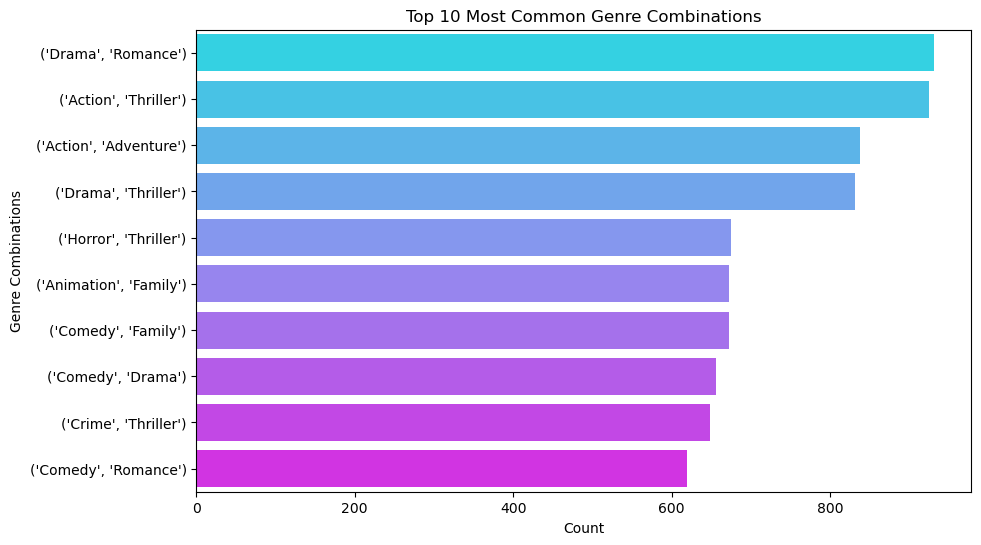

In [25]:
# Plot the top genre combinations
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre Combination', data=genre_comb_df, palette='cool')
plt.title('Top 10 Most Common Genre Combinations')
plt.xlabel('Count')
plt.ylabel('Genre Combinations')
plt.show()

## Correlation Heatmap

The correlation heatmap is a valuable tool to visualize the relationships between numerical variables in the dataset. It provides an understanding of how strongly different variables are related to one another, which can be useful for feature selection in model building.

- We calculated the correlation matrix for the numerical columns in the dataset.
- Using this matrix, we created a heatmap to show the pairwise correlations.
- The heatmap visualizes positive and negative correlations, with higher values indicating stronger relationships.

This analysis helps identify which features are strongly correlated, and which ones may be redundant or could be removed.

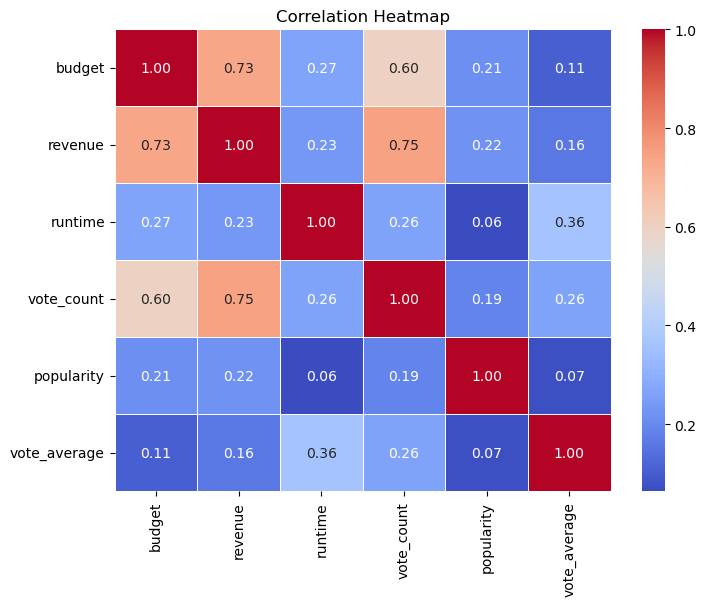

In [26]:
# Filter out rows where budget, revenue, vote_count, etc., are zero
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['vote_count'] > 0) & (df['runtime'] > 0) & (df['vote_average'] > 0)]

# Select numeric columns for correlation heatmap
numeric_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity', 'vote_average']
corr = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()